# K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import completeness_score
from sklearn.cluster import KMeans

## Load and Preprocess the Dataset

In [2]:
RANDOM_STATE = 10

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

## Create the Model from Scratch

In [3]:
class KMeansFromScratch:
    PLOT_X1_LIM = [1, 6.9]
    PLOT_X2_LIM = [0.1, 2.5]
    COLORS = ['tab:blue', 'tab:orange', 'tab:green']
    
    def __init__(self, n_clusters=8):
        self.n_clusters = n_clusters
        self.centroids = None

    def get_initial_centroids(self, x_train_param):
        centroids = x_train_param.sample(frac=1, random_state=RANDOM_STATE)[:self.n_clusters]
        
        return np.array(centroids)
    
    def get_nearest_cluster_for_instances(self, x_param):
        x_len = len(x_param)
        features_dimension = len(x_param.iloc[0])
        x_train_stacked = np.stack([x_param] * self.n_clusters, axis=0)
        centroids_repeated = np.repeat(self.centroids, x_len, axis=0)
        centroids_repeated = centroids_repeated.reshape(
            (self.n_clusters, x_len, features_dimension)
        )
        distances = np.linalg.norm(x_train_stacked - centroids_repeated, axis=2)
    
        return np.argpartition(distances.transpose(), 1)[:, :1].ravel()

    def get_centroids(self, x_train_param, nearest_cluster_for_instances):
        centroids = []
        
        for cluster_index in range(self.n_clusters):
            cluster_instances_mean = np.mean(
                x_train_param[nearest_cluster_for_instances == cluster_index], axis=0
            )
    
            centroids.append(cluster_instances_mean)
    
        return np.array(centroids)

    def animate(self, frame, ax, x1, x2, centroids_frames, nearest_cluster_for_instances_frames):
        ax.clear()
        ax.set_xlim(self.PLOT_X1_LIM)
        ax.set_ylim(self.PLOT_X2_LIM)

        for cluster_index in range(self.n_clusters):
            cluster_instance_indexes = (
                nearest_cluster_for_instances_frames[frame] == cluster_index
            )
        
            ax.scatter(x1[cluster_instance_indexes], x2[cluster_instance_indexes], 
                       color=self.COLORS[cluster_index],
                       label=f"Cluster {cluster_index + 1} Instances")
            ax.scatter(centroids_frames[frame][cluster_index, 0],
                       centroids_frames[frame][cluster_index, 1],
                       color=self.COLORS[cluster_index],
                       marker='*', edgecolor='black', s=200,
                       label=f"Cluster {cluster_index + 1} Centroid")

        ax.legend()
        ax.set_axisbelow(True)
        ax.grid(color='grey')
        ax.set_title(f"#{frame + 1} Iteration")
        ax.set_xlabel('petal length (cm)')
        ax.set_ylabel('petal width (cm)')
    
    def fit(self, x_train_param, create_animation=False):
        self.centroids = self.get_initial_centroids(x_train_param)
        
        is_same_nearest_cluster_for_instances = False
        nearest_cluster_for_instances = self.get_nearest_cluster_for_instances(x_train_param)
        centroids_frames = []
        nearest_cluster_for_instances_frames = []
        
        if create_animation:
            if len(x_train_param.iloc[0]) != 2:
                raise Exception(("This K-Means clustering animation implementation works only "
                                 "with two-dimensional features!"))
            
            centroids_frames.append(self.centroids)
            nearest_cluster_for_instances_frames.append(nearest_cluster_for_instances)
 
        while not is_same_nearest_cluster_for_instances:
            self.centroids = self.get_centroids(x_train_param, nearest_cluster_for_instances)

            new_nearest_cluster_for_instances = self.get_nearest_cluster_for_instances(
                x_train_param
            )
            
            if create_animation:
                centroids_frames.append(self.centroids)
                nearest_cluster_for_instances_frames.append(new_nearest_cluster_for_instances)
            
            is_same_nearest_cluster_for_instances = np.all(
                nearest_cluster_for_instances == new_nearest_cluster_for_instances
            )

            if not is_same_nearest_cluster_for_instances:
                nearest_cluster_for_instances = new_nearest_cluster_for_instances
                
        if create_animation:
            frames = len(centroids_frames)
            x1 = x_train_param.iloc[:, 0]
            x2 = x_train_param.iloc[:, 1]
            
            fig, ax = plt.subplots(figsize=plt.figaspect(1.))
            animation = FuncAnimation(fig, self.animate, frames, fargs=(
                ax, x1, x2, centroids_frames, nearest_cluster_for_instances_frames
            ))

            animation.save('k_means_clustering.gif', writer=PillowWriter(fps=1), dpi=200)

    def predict(self, x_test_param):
        return self.get_nearest_cluster_for_instances(x_test_param)

## Create an Animation and Compare Implementations

0.9162790716832822

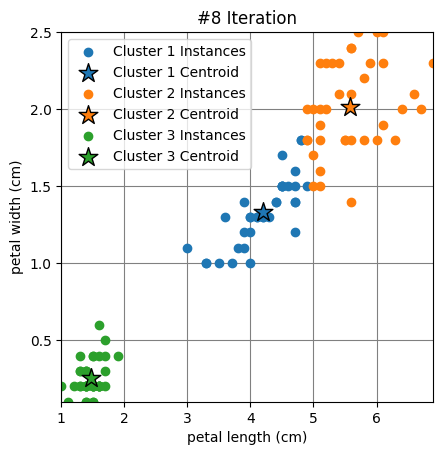

In [4]:
model_from_scratch = KMeansFromScratch(n_clusters=3)

model_from_scratch.fit(X_train, create_animation=True)

y_pred = model_from_scratch.predict(X_test)

completeness_score(y_test, y_pred)

In [5]:
model = KMeans(n_clusters=3)

model.fit(X_train)

y_pred = model.predict(X_test)

completeness_score(y_test, y_pred)

0.9162790716832822